## Двухфакторный дисперсионный анализ (Two-way ANOVA)  
Часто бывает и такое, что одни и те же данные можно разделить на группы по разным основаниям - иначе говоря,  
мы можем проверять эффект нескольких номинативных переменных на зависимую переменную.  
Например, двухфакторный дисперсионный анализ проверяет влияние двух номинативных переменных (факторов).

Таким образом, общая сумма квадратов теперь складывается из большего количества величин:  
$SST = SSW + SSB_{A} + SSB_{B} + SSB_{A} * SSB_{B}$  
Здесь буквами A и B обозначены межгрупповые суммы квадратов для соответствующих факторов, а $SSB_{A} * SSB_{B}$  
обозначает их взаимодействие. Взаимодействие факторов – это случай, когда связь зависимой переменной от одного фактора  
связана со значениями другого (например, противоположный эффект фактора А для групп, которые сформировались по фактору B).  

Как и с однофакторным дисперсионным анализом, мы можем констатировать только общую значимость конкретного фактора, но не можем сказать,  
какие именно группы различаются и каким образом. Для этого нам опять нужны парные сравнения с поправками.  
Полученные данные, какие бы они ни были, не означают однозначной каузальной связи между переменными –  
установить её позволяет только правильно организованный эксперимент.  

Требования к данным:  
* Дисперсии внутри наших групп должны быть примерно одинаковы (требование гомогенности дисперсий).  
Проверить можно с помощью критерия Левена и критерия Бартлетта
* Если объем выборки недостаточно большой (меньше 30), то важно соблюдать требование о нормальности распределения двух выборок.

### Задача  
Анализ экспрессии генов лейкоцитов позволяет предсказать вероятность развития атросклероза.  
В эксперименте исследовался уровень экспрессии в зависимости от возраста пациентов и дозировки лекарства аторвастатина. 

In [1]:
import pandas as pd

atherosclerosis_data = pd.read_csv('./data/atherosclerosis.csv')

In [2]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('expr ~ age + dose', data=atherosclerosis_data).fit() # 'зависимая_переменная ~ фактор1 + фактор2 + фактор1:фактор2'
anova_results = anova_lm(model, type=2)
print(anova_results)

            df       sum_sq     mean_sq         F    PR(>F)
dose       1.0    16.912241   16.912241  0.648351  0.423830
age        1.0   197.452754  197.452754  7.569592  0.007804
Residual  61.0  1591.184501   26.084992       NaN       NaN


PR(>F) для age является значимым

* sum_sq - сумма квадратов
* df - степени свободы
* F - F-значение
* PR (>F) - p-значение

<AxesSubplot:xlabel='dose', ylabel='expr'>

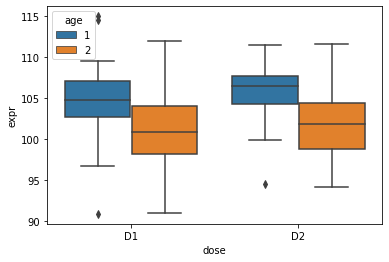

In [3]:
import seaborn as sns

sns.boxplot(data=atherosclerosis_data, y='expr', x='dose', hue="age")
# sns.swarmplot(data=atherosclerosis_data, y='expr', x='dose', hue="age", color=".25")

<AxesSubplot:xlabel='dose', ylabel='expr'>

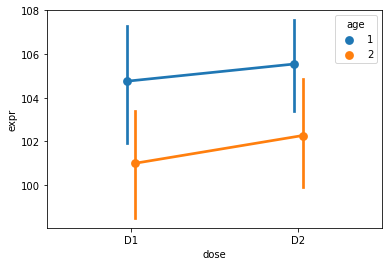

In [4]:
sns.pointplot(data=atherosclerosis_data, y='expr', x='dose', hue="age", dodge=True)

### Взаимодействие факторов в ANOVA

### Задача  
Исследователей интересовало влияние инъекции некоторого гормона на показатель концентрации кальция в плазме крови у птиц с учетом их пола.

In [5]:
birds_data = pd.read_csv('./data/birds.csv')

In [6]:
model = ols('var4 ~ hormone + sex + hormone * sex', data=birds_data).fit()
anova_results = anova_lm(model, type=2)
print(anova_results)

               df      sum_sq    mean_sq         F    PR(>F)
hormone       1.0    0.847472   0.847472  0.086528  0.769653
sex           1.0    0.119762   0.119762  0.012228  0.912318
hormone:sex   1.0   89.483384  89.483384  9.136390  0.003682
Residual     60.0  587.650394   9.794173       NaN       NaN


PR(>F) для взаимодействия hormone:sex является значимым

<AxesSubplot:xlabel='hormone', ylabel='var4'>

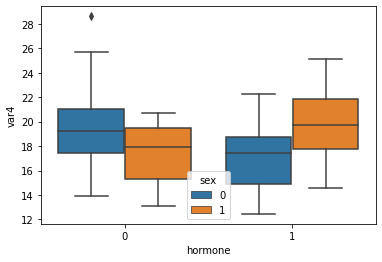

In [7]:
sns.boxplot(data=birds_data, y='var4', x='hormone', hue="sex")

<AxesSubplot:xlabel='hormone', ylabel='var4'>

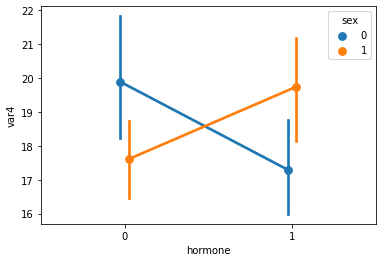

In [8]:
sns.pointplot(data=birds_data, y='var4', x='hormone', hue="sex", dodge=True)

### 2 условия для приминимости дисперсионного анализа

### Тесты на нормальность Лиллиефорса, Шапиро-Уилка​

In [9]:
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import lilliefors

genetherapy_data = pd.read_csv('./data/genetherapy.csv')

# Н0: 'распределение - нормальное'

for therapy, group in genetherapy_data.groupby('Therapy'):
    stat, p_value = lilliefors(group.expr)
    print(therapy, ':', 'Lilliefors', lilliefors(group.expr))

for therapy, group in genetherapy_data.groupby('Therapy'):
    print(therapy, ':', 'Shapiro', shapiro(group.expr))

A : Lilliefors (0.14826712772993095, 0.49289993987238556)
B : Lilliefors (0.1806615874292501, 0.21285268714919528)
C : Lilliefors (0.15432381874869439, 0.4355128701716944)
D : Lilliefors (0.09389574071984347, 0.9708553122495491)
A : Shapiro ShapiroResult(statistic=0.887749969959259, pvalue=0.062011588364839554)
B : Shapiro ShapiroResult(statistic=0.9259758591651917, pvalue=0.23740161955356598)
C : Shapiro ShapiroResult(statistic=0.9287736415863037, pvalue=0.2615790367126465)
D : Shapiro ShapiroResult(statistic=0.9913022518157959, pvalue=0.999784529209137)


### Тест гомогенности дисперсий. Тест Левина

In [10]:
from scipy.stats import levene

# H0: D1 = D2 = D3 = D4

print(levene(*[list(group.expr.values) for therapy, group in genetherapy_data.groupby('Therapy')]))

LeveneResult(statistic=0.6477908627745761, pvalue=0.5876330665111003)
